In [1]:
from GRpy.all import *
init_printing(use_unicode=True)

# Sphere:

Metric:
$$
g_{ij}(\theta, \phi)=
\begin{bmatrix}
a^2 & 0\\
 0 & a^2 \sin^2(\theta)
\end{bmatrix},
$$
with $a$ the radius of the sphere.

First we define the symbols for the coordinates $x^a=(\theta,\phi)$ and the constants:

In [2]:
a, theta, phi = symbols('a, theta, phi')

Now we define the variable `gab` as a Metric depending on the coordinates, and asign the components:

In [3]:
gab = Metric((theta, phi))
gab[-0,-0] = a**2
gab[-0,-1] = 0
gab[-1,-0] = 0
gab[-1,-1] = (a**2)*(sin(theta))**2

The object `gab` is of type `GRpy.Tensor.Metric`, and has several associated methods:

In [4]:
type(gab)

GRpy.Tensor.Metric

In [5]:
gab.components

In [6]:
gab.getNonZero()

In [7]:
gab.symbol

In [8]:
gab.__str__()

The non-zero components of g_{ab} are:
(-1, -1) : a**2*sin(theta)**2
(0, 0) : a**2


The inverse is computed using `.invert()`:

In [9]:
ginv = gab.invert()

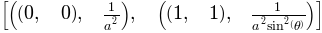

In [10]:
ginv.getNonZero()

In [11]:
ginv.__str__()

The non-zero components of g_inv are:
(0, 0) : a**(-2)
(1, 1) : 1/(a**2*sin(theta)**2)


The method `.invert()` computes the inverse:

The Christoffel symbols of the second kind $\{^a_{bc}\}$ are computed using the function `Christoffel`:

In [12]:
chris = Christoffel(gab)

In [13]:
chris.symbol

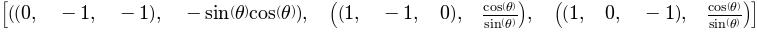

In [14]:
chris.getNonZero()

If we want access to a particular component, we can write:

In [15]:
chris.components[(0,-1,-1)]

Similarly, the Riemann tensor can be computed from the Christoffel symbols:

In [16]:
riem = Riemann(chris)

In [17]:
riem.symbol

In [18]:
riem.getNonZero()

By default, `Riemann()` computes the covariant components of the curvature. The completely contravariant components $R^{abcd}$ can then be computed using the method `.Riemann_cont`:

In [19]:
riem.Riemann_cont.symbol

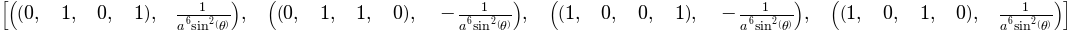

In [20]:
riem.Riemann_cont.getNonZero()

Similarly, `.Riemann_par` computes $R^{ab}_{\ \ cd}$:

In [21]:
riem.Riemann_par.symbol

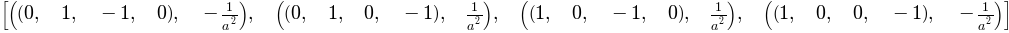

In [22]:
riem.Riemann_par.getNonZero()

The Ricci tensor of a given curvature tensor is computed using `Ricci()`, with the curvature tensor as argument:

In [23]:
ricc = Ricci(riem)
ricc.symbol

In [24]:
ricc.getNonZero()

The curvature scalar $R=g^{ab}R_{ab}$ can be computed using `Scalar(Metric, Ricci, Riemann)`:

In [25]:
scurv = Scurv(gab,ricc)
scurv

In [26]:
einstein = Einstein(gab, ricc, scurv)
einstein.getNonZero()

NameError: global name 'Rational' is not defined

In [ ]:
Rational(1,2)

In [ ]:
#gij_det = gij.determinant


Kretschmann_scalar = scalar.Scr_Kretsch#
Other_scalar = scalar.Scr_Other#


In [ ]:
einstein.__str__()

# Verifying:

Consider the following properties for spaces with constant curvature:

$$ R_{ijkl}=\alpha (g_{ik}g_{jl}-g_{jk}g_{il}),$$
$$ g_{ij}= \frac{R_{ij}}{\alpha(d-1)},$$

Then 
$$\alpha = R/(d(d-1)).$$

As $d=2$ and $R =2/a^2$, then $\alpha =1/a^2$.

In [ ]:
alpha = 1/(a**2)

In [ ]:
for i in range(2):
    for j in range(2):
        for m in range(2):
            for l in range(2):
                cosa = gij.components[-i,-m]*gij.components[-j,-l]-gij.components[-j,-m]*gij.components[-i,-l]
                print '(%d,%d,%d,%d)'%(i,j,m,l), cancel(riemann.components[-i,-j,-m,-l])==simplify(alpha*cosa)

In [ ]:
for i in range(2):
    for j in range(2):
        print '(%d,%d)'%(i,j), cancel(gij.components[-i,-j])==simplify(ricci.components[-i,-j]/(alpha))

# Killing Equation

In [ ]:
A0 = Function('A0')(theta,phi)
A1 = Function('A1')(theta,phi)

In [ ]:
A = XI((theta,phi))
A[0] = A0
A[1] = A1

In [ ]:
Ke = Killing_Equation(A,gij)

In [ ]:
Ke.components

In [ ]:
e1=Ke.components[(-1,-1)]
e2=Ke.components[(-1,0)]
e3=Ke.components[(0,0)]

In [ ]:
e3

In [ ]:
s=pdsolve(e3)

In [ ]:
e4=e1.subs(A0,s.rhs)
e4

In [ ]:
s2=solve(e4,F)
s2

In [ ]:
e2.subs(A0,s.rhs)

In [ ]:
Ke.__str__()

# Checking Killing equations:

$$\vec{\xi}_{1}(\theta,\phi)=(\sin(\phi),\cot(\theta)\cos(\theta)),$$
$$\vec{\xi}_{2}(\theta,\phi)=(\cos(\phi),-\cot(\theta)\sin(\theta)),$$
$$\vec{\xi}_{3}(\theta,\phi)=(0,1).$$

In [ ]:
xi1 = XI((theta,phi))
xi2 = XI((theta,phi))
xi3 = XI((theta,phi))
xi1[0] = sin(phi)
xi1[1] = cot(theta)*cos(phi)
xi2[0] = cos(phi)
xi2[1] = -cot(theta)*sin(phi)
xi3[0] = 0
xi3[1] = 1

In [ ]:
Ke1 = Killing_Equation(xi1,gij)
Ke2 = Killing_Equation(xi2,gij)
Ke3 = Killing_Equation(xi3,gij)

In [ ]:
Ke1.__str__()
Ke2.__str__()
Ke3.__str__()

# Covariant derivative:

In [ ]:
A0 = Function('A0')(theta,phi)
A1 = Function('A1')(theta,phi)

In [ ]:
A = XI((theta,phi))

In [ ]:
A[0]= A0
A[1]= A1

In [ ]:
Cov_der = Covariant_Derivative(A, christoffel)

In [ ]:
Cov_der.__str__()

# Geodesic equation:

In [ ]:
Geo_eq = Geodesic_Equation(christoffel)

In [ ]:
Geo_eq.__str__()

In [ ]:
Geo_eq.components[0]

In [ ]:
Geo_eq.components[1]

In [ ]:
Geo_eq.x_up.components[0]

In [ ]:
Geo_eq.x_up.components[1]

In [ ]:
Geo_eq.x_down.components[-0]

In [ ]:
Geo_eq.x_down.components[-1]